## 주거타입별 예측 모델

In [44]:
# -*- coding:utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

total_df = pd.read_csv("data/seoul_real_estate.csv")
total_df['DEAL_YMD'] = pd.to_datetime(total_df['DEAL_YMD'], format="%Y-%m-%d")
types = list(total_df['HOUSE_TYPE'].unique())
print(types)
periods = 28

['단독다가구', '아파트', '오피스텔', '연립다세대']


In [46]:
model = Prophet()
total_df2 = total_df.loc[total_df['HOUSE_TYPE'] == types[0], ["DEAL_YMD", "OBJ_AMT"]]
result_df = total_df2.groupby('DEAL_YMD')['OBJ_AMT'].agg("mean").reset_index()
result_df = result_df.rename(columns={"DEAL_YMD": "ds", "OBJ_AMT": "y"})
model.fit(result_df)
future = model.make_future_dataframe(periods=periods)
forecast = model.predict(future1)
forecast.tail()

2023-05-14 22:59:15.631 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 22:59:15.708 DEBUG   cmdstanpy: TBB already found in load path
2023-05-14 22:59:15.720 INFO    prophet: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-05-14 22:59:15.721 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-05-14 22:59:15.731 DEBUG   cmdstanpy: input tempfile: C:\Users\j2hoo\AppData\Local\Temp\tmpvu_mnlov\m85imqt0.json
2023-05-14 22:59:15.735 DEBUG   cmdstanpy: input tempfile: C:\Users\j2hoo\AppData\Local\Temp\tmpvu_mnlov\5peehpx8.json
2023-05-14 22:59:15.736 DEBUG   cmdstanpy: idx 0
2023-05-14 22:59:15.737 DEBUG   cmdstanpy: running CmdStan, num_threads: None
2023-05-14 22:59:15.738 DEBUG   cmdstanpy: CmdStan args: ['C:\\Users\\j2hoo\\OneDrive\\Documents\\streamlitbook-evansarah\\venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=74377', 'data', 'file

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
89,2023-05-28,98567.002538,-24515.812910,109251.465749,98566.999071,98567.006305,-54568.087492,-54568.087492,-54568.087492,-54568.087492,-54568.087492,-54568.087492,0.0,0.0,0.0,43998.915046
90,2023-05-29,98022.444605,23202.038544,159074.857407,98022.440852,98022.448572,-6520.760565,-6520.760565,-6520.760565,-6520.760565,-6520.760565,-6520.760565,0.0,0.0,0.0,91501.684040
91,2023-05-30,97477.886671,46738.543638,180741.991557,97477.882789,97477.890860,15589.745703,15589.745703,15589.745703,15589.745703,15589.745703,15589.745703,0.0,0.0,0.0,113067.632375
92,2023-05-31,96933.328738,37559.653274,165567.150841,96933.324602,96933.333123,3545.606926,3545.606926,3545.606926,3545.606926,3545.606926,3545.606926,0.0,0.0,0.0,100478.935663
93,2023-06-01,96388.770804,28434.521244,159571.259486,96388.766441,96388.775394,-2956.095007,-2956.095007,-2956.095007,-2956.095007,-2956.095007,-2956.095007,0.0,0.0,0.0,93432.675797


2023-05-14 23:11:41.095 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 23:11:41.168 DEBUG   cmdstanpy: TBB already found in load path
2023-05-14 23:11:41.176 INFO    prophet: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-05-14 23:11:41.176 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-05-14 23:11:41.187 DEBUG   cmdstanpy: input tempfile: C:\Users\j2hoo\AppData\Local\Temp\tmpvu_mnlov\8vx54r7x.json
2023-05-14 23:11:41.191 DEBUG   cmdstanpy: input tempfile: C:\Users\j2hoo\AppData\Local\Temp\tmpvu_mnlov\ajkoe2y1.json
2023-05-14 23:11:41.193 DEBUG   cmdstanpy: idx 0
2023-05-14 23:11:41.193 DEBUG   cmdstanpy: running CmdStan, num_threads: None
2023-05-14 23:11:41.194 DEBUG   cmdstanpy: CmdStan args: ['C:\\Users\\j2hoo\\OneDrive\\Documents\\streamlitbook-evansarah\\venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=54233', 'data', 'file

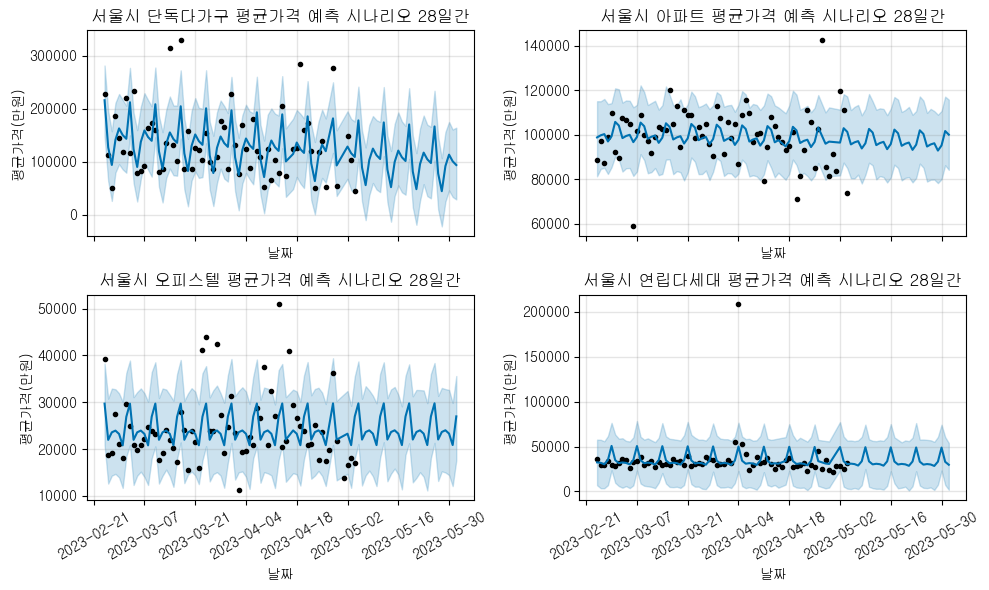

In [47]:
fig, ax = plt.subplots(figsize=(10, 6), sharex=True, ncols=2, nrows=2)
for i in range(0, len(types)):
    model = Prophet()
    total_df2 = total_df.loc[total_df['HOUSE_TYPE'] == types[i], ["DEAL_YMD", "OBJ_AMT"]]
    result_df = total_df2.groupby('DEAL_YMD')['OBJ_AMT'].agg("mean").reset_index()
    result_df = result_df.rename(columns={"DEAL_YMD": "ds", "OBJ_AMT": "y"})
    model.fit(result_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    if i <= 1:
        fig = model.plot(forecast, uncertainty=True, ax=ax[0, i])
        ax[0, i].set_title(f"서울시 {types[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[0, i].set_xlabel(f"날짜")
        ax[0, i].set_ylabel(f"평균가격(만원)")
        for tick in ax[0, i].get_xticklabels():
            tick.set_rotation(30)
    else:
        fig = model.plot(forecast, uncertainty=True, ax=ax[1, i-2])
        ax[1, i-2].set_title(f"서울시 {types[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[1, i-2].set_xlabel(f"날짜")
        ax[1, i-2].set_ylabel(f"평균가격(만원)")
        for tick in ax[1, i-2].get_xticklabels():
            tick.set_rotation(30)
            
plt.tight_layout()
plt.savefig('output/ml01.png', dpi=200)
plt.show()

## 예측 모델 지역구별로 저장

In [34]:
import matplotlib.pyplot as plt
import streamlit as st
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json
import json

total_df = pd.read_csv("data/seoul_real_estate.csv")
total_df['DEAL_YMD'] = pd.to_datetime(total_df['DEAL_YMD'], format="%Y-%m-%d")
total_df = total_df[total_df['HOUSE_TYPE'] == "아파트"]

sgg_nms = sorted(list(total_df['SGG_NM'].unique()))
periods = 28
for sgg_nm in sgg_nms:
    model = Prophet()
    total_df2 = total_df.loc[total_df['SGG_NM'] == sgg_nm, ["DEAL_YMD", "OBJ_AMT"]]
    summary_df = total_df2.groupby('DEAL_YMD')['OBJ_AMT'].agg("mean").reset_index()
    summary_df = summary_df.rename(columns={"DEAL_YMD": "ds", "OBJ_AMT": "y"})
    model.fit(summary_df)
    
    with open(f'ml/models/{sgg_nm}_model.json', 'w') as fout:
        json.dump(model_to_json(model), fout)  # Save model

2023-05-14 21:54:34.005 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:34.086 DEBUG   cmdstanpy: TBB already found in load path
2023-05-14 21:54:34.093 INFO    prophet: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-05-14 21:54:34.094 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-05-14 21:54:34.106 DEBUG   cmdstanpy: input tempfile: C:\Users\j2hoo\AppData\Local\Temp\tmpvu_mnlov\eoo3fw24.json
2023-05-14 21:54:34.109 DEBUG   cmdstanpy: input tempfile: C:\Users\j2hoo\AppData\Local\Temp\tmpvu_mnlov\7m0bvwr8.json
2023-05-14 21:54:34.111 DEBUG   cmdstanpy: idx 0
2023-05-14 21:54:34.112 DEBUG   cmdstanpy: running CmdStan, num_threads: None
2023-05-14 21:54:34.112 DEBUG   cmdstanpy: CmdStan args: ['C:\\Users\\j2hoo\\OneDrive\\Documents\\streamlitbook-evansarah\\venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=67767', 'data', 'file

## 저장된 예측 모형 불러오기

In [35]:
import json 
from prophet.serialize import model_from_json

models = [] 
for sgg_nm in sgg_nms:
    print(sgg_nm)
    with open(f'ml/models/{sgg_nm}_model.json', 'r') as fin:
        model = model_from_json(json.load(fin))  # Load model
    models.append(model)
models

2023-05-14 21:54:47.169 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:47.267 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:47.278 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:47.359 DEBUG   cmdstanpy: TBB already found in load path


강남구
강동구


C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:47.370 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:47.457 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get 

강북구
강서구


C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:47.559 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:47.635 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get 

관악구
광진구
구로구


2023-05-14 21:54:47.739 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:47.824 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:47.834 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:47.925 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future ver

금천구
노원구


C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:48.024 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:48.105 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get 

도봉구
동대문구


C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:48.211 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:48.297 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get 

동작구
마포구


2023-05-14 21:54:48.418 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:48.429 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:48.520 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the o

서대문구
서초구


2023-05-14 21:54:48.618 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:48.629 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:48.712 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the o

성동구
성북구
송파구


C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:48.815 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:48.895 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get 

양천구
영등포구
용산구


2023-05-14 21:54:49.173 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:49.183 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:49.264 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the o

은평구
종로구


C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))
2023-05-14 21:54:49.376 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-05-14 21:54:49.463 DEBUG   cmdstanpy: TBB already found in load path
C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get 

중구
중랑구


C:\Users\j2hoo\OneDrive\Documents\streamlitbook-evansarah\venv\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [20]:
models[0]
future1 = models[0].make_future_dataframe(periods=periods)
forecast1 = model.predict(future1)

25

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


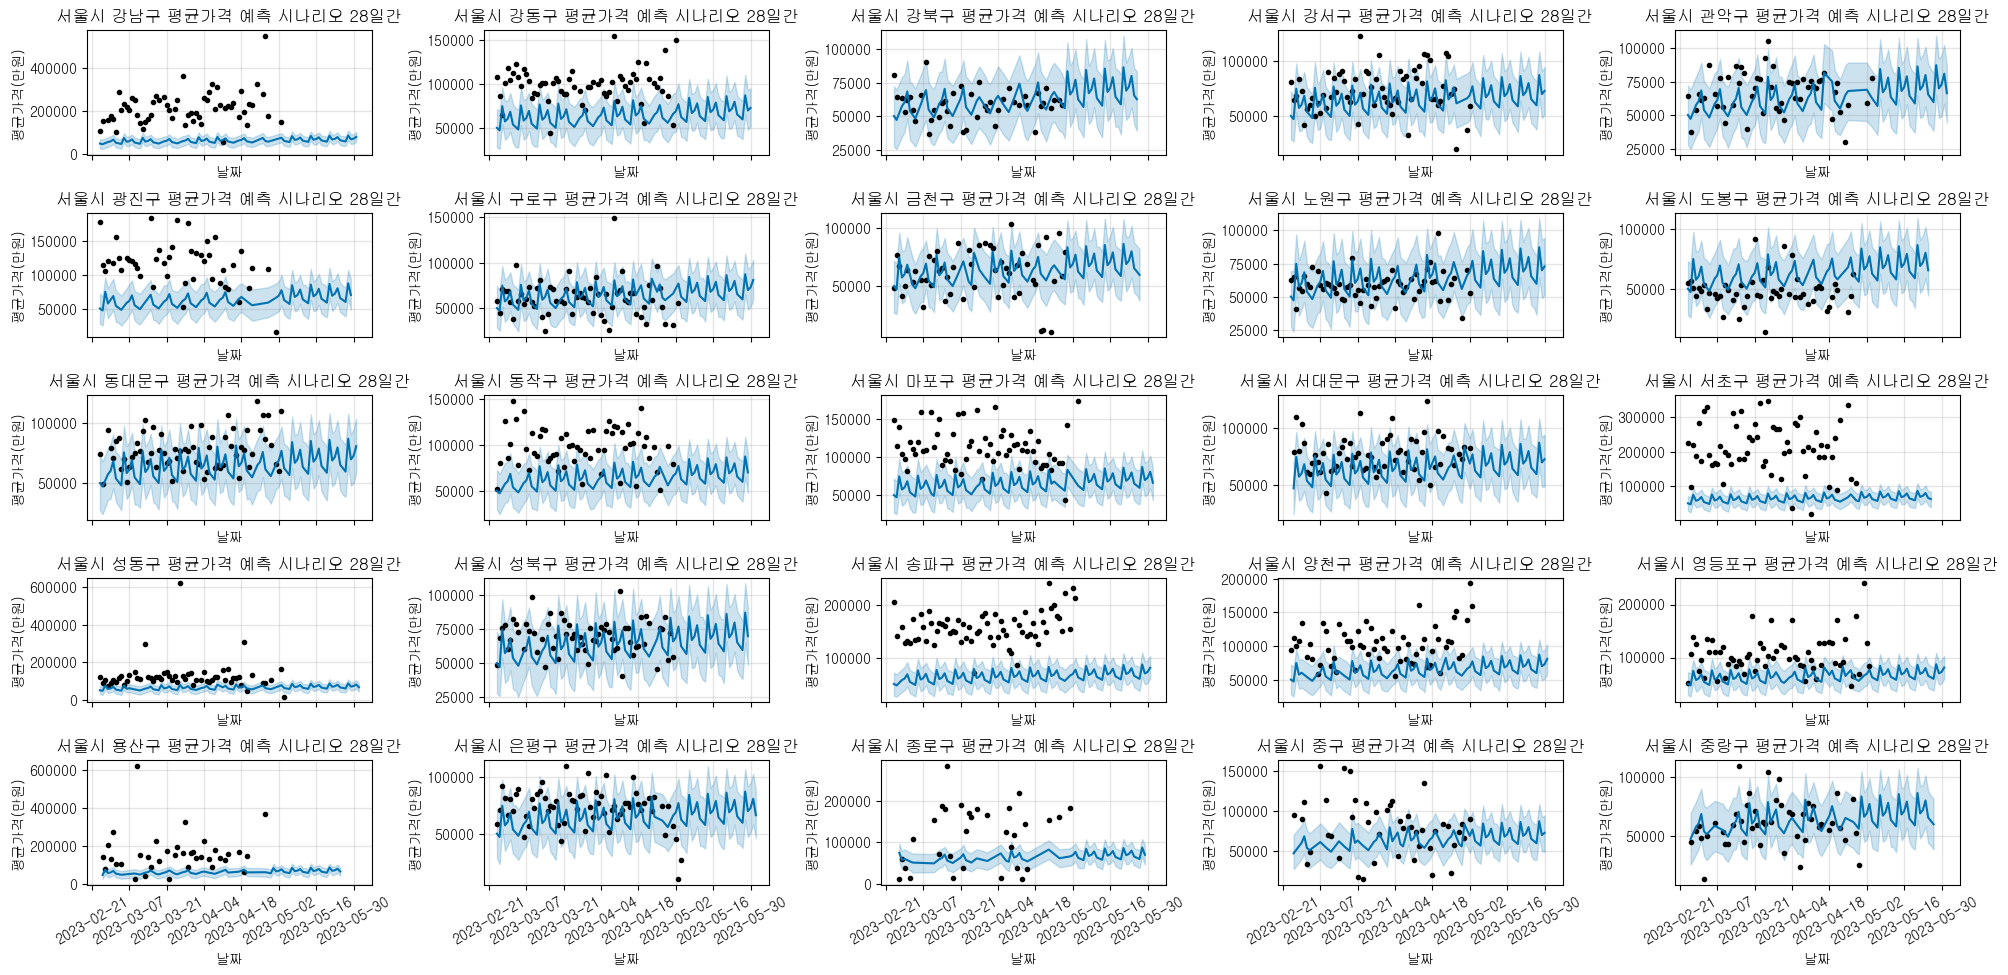

In [39]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
periods = 28
fig, ax = plt.subplots(figsize=(20, 10), sharex=True, ncols=5, nrows=5)
for i in range(0, len(sgg_nms)):
    future1 = models[i].make_future_dataframe(periods=periods)
    forecast1 = model.predict(future1)
    print(sgg_nms[i])
    if i <= 4:

        fig = models[i].plot(forecast1, uncertainty=True, ax=ax[0, i])
        ax[0, i].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[0, i].set_xlabel(f"날짜")
        ax[0, i].set_ylabel(f"평균가격(만원)")
        for tick in ax[0, i].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 9:

        fig = models[i].plot(forecast1, uncertainty=True, ax=ax[1, i-5])
        ax[1, i-5].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[1, i-5].set_xlabel(f"날짜")
        ax[1, i-5].set_ylabel(f"평균가격(만원)")
        for tick in ax[1, i-5].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 14:

        fig = models[i].plot(forecast1, uncertainty=True, ax=ax[2, i-10])
        ax[2, i-10].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[2, i-10].set_xlabel(f"날짜")
        ax[2, i-10].set_ylabel(f"평균가격(만원)")
        for tick in ax[2, i-10].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 19:

        fig = models[i].plot(forecast1, uncertainty=True, ax=ax[3, i-15])
        ax[3, i-15].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[3, i-15].set_xlabel(f"날짜")
        ax[3, i-15].set_ylabel(f"평균가격(만원)")
        for tick in ax[3, i-15].get_xticklabels():
            tick.set_rotation(30)
    elif i <= 24:

        fig = models[i].plot(forecast1, uncertainty=True, ax=ax[4, i-20])
        ax[4, i-20].set_title(f"서울시 {sgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
        ax[4, i-20].set_xlabel(f"날짜")
        ax[4, i-20].set_ylabel(f"평균가격(만원)")
        for tick in ax[4, i-20].get_xticklabels():
            tick.set_rotation(30)
    else:
        pass 
plt.tight_layout()
plt.subplots_adjust(top=0.95)